In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [19]:
health_df = pd.read_csv('/content/drive/MyDrive/Health care/insurance.csv')
health_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
print(health_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [21]:
X = health_df[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]
y = health_df['charges']
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)
scaler = StandardScaler()
X[['age', 'bmi', 'children']] = scaler.fit_transform(X[['age', 'bmi', 'children']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

test_loss = model.evaluate(X_test, y_test)

test_accuracy = 1 - test_loss
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/10
34/34 - 1s - loss: 322387616.0000 - 820ms/epoch - 24ms/step
Epoch 2/10
34/34 - 0s - loss: 322094112.0000 - 64ms/epoch - 2ms/step
Epoch 3/10
34/34 - 0s - loss: 321147488.0000 - 72ms/epoch - 2ms/step
Epoch 4/10
34/34 - 0s - loss: 318826112.0000 - 67ms/epoch - 2ms/step
Epoch 5/10
34/34 - 0s - loss: 314154400.0000 - 73ms/epoch - 2ms/step
Epoch 6/10
34/34 - 0s - loss: 306449312.0000 - 64ms/epoch - 2ms/step
Epoch 7/10
34/34 - 0s - loss: 294971584.0000 - 60ms/epoch - 2ms/step
Epoch 8/10
34/34 - 0s - loss: 279395168.0000 - 58ms/epoch - 2ms/step
Epoch 9/10
34/34 - 0s - loss: 260585536.0000 - 60ms/epoch - 2ms/step
Epoch 10/10
34/34 - 0s - loss: 238215360.0000 - 70ms/epoch - 2ms/step
9/9 [==============================] - 0s 2ms/step
Mean Absolute Error: 9805.978303832559
9/9 [==============================] - 0s 2ms/step - loss: 227606352.0000
Test Accuracy: -22760635100.00%


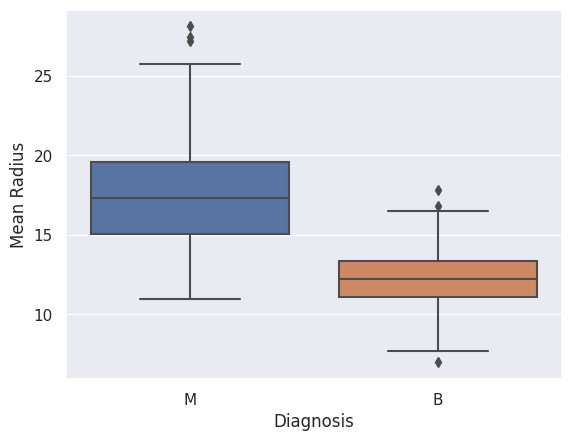

<ipython-input-22-355b13a2ee47>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


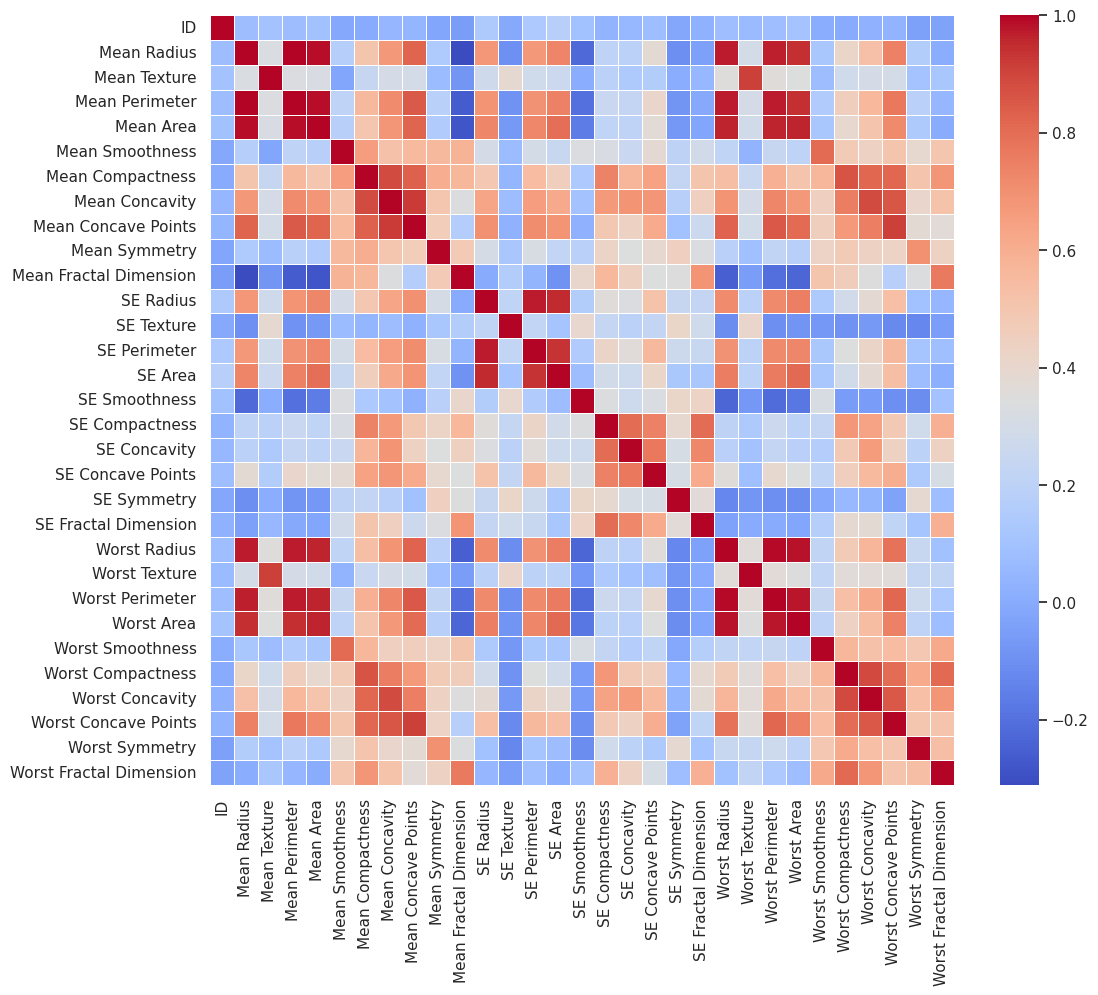

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area",
                "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points",
                "Mean Symmetry", "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter",
                "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points",
                "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter",
                "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points",
                "Worst Symmetry", "Worst Fractal Dimension"]
data = pd.read_csv(url, names=column_names)

data_description = data.describe()

sns.boxplot(x="Diagnosis", y="Mean Radius", data=data)
plt.show()

correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

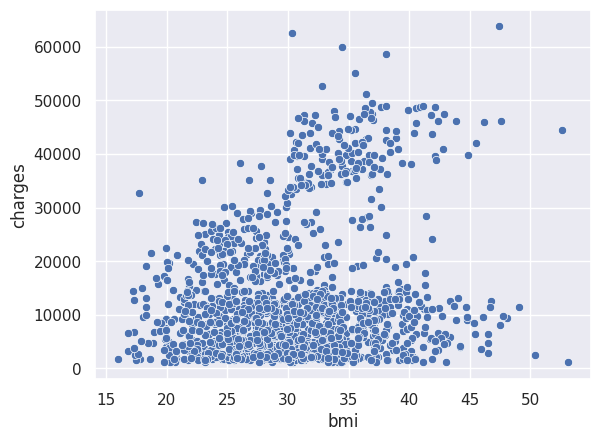

In [23]:
sns.scatterplot(x=health_df['bmi'], y=health_df['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

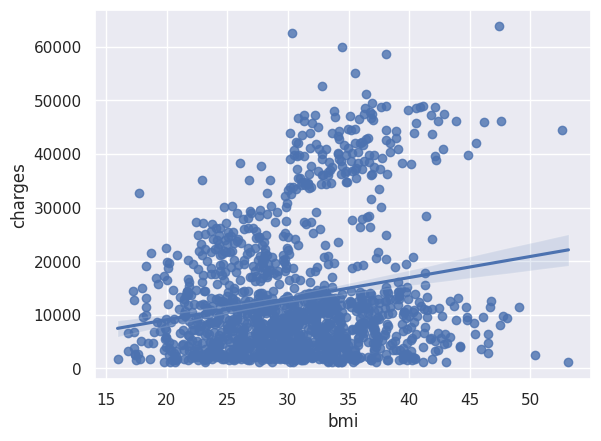

In [24]:
sns.regplot(x=health_df['bmi'], y=health_df['charges'])

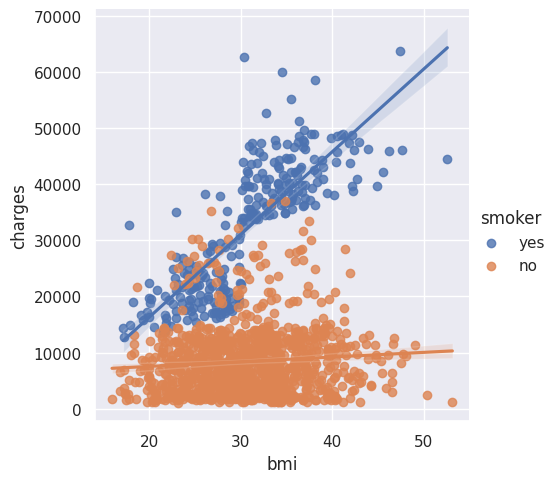

In [25]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=health_df)

<Axes: xlabel='age', ylabel='charges'>

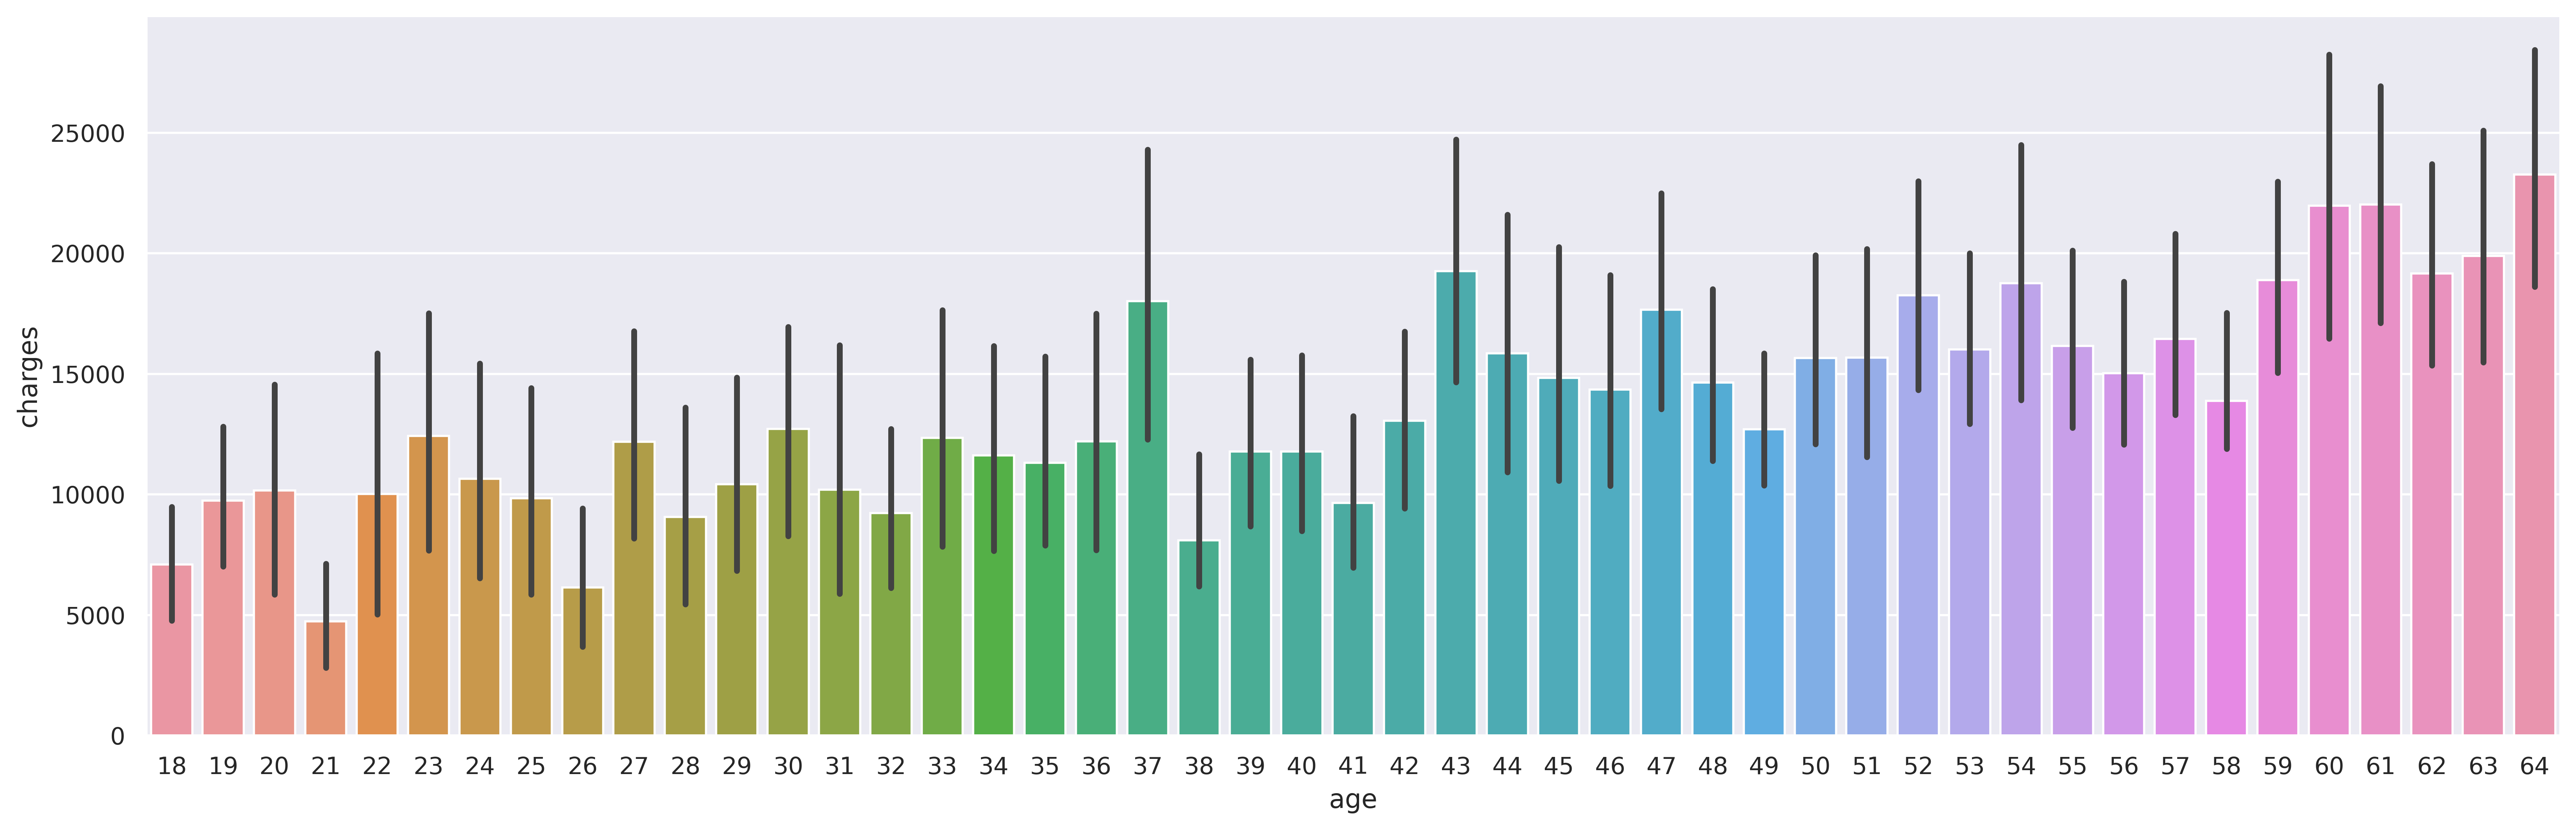

In [26]:
sns.set()
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot( x = 'age', y = 'charges', data = health_df)

<Axes: xlabel='sex', ylabel='charges'>

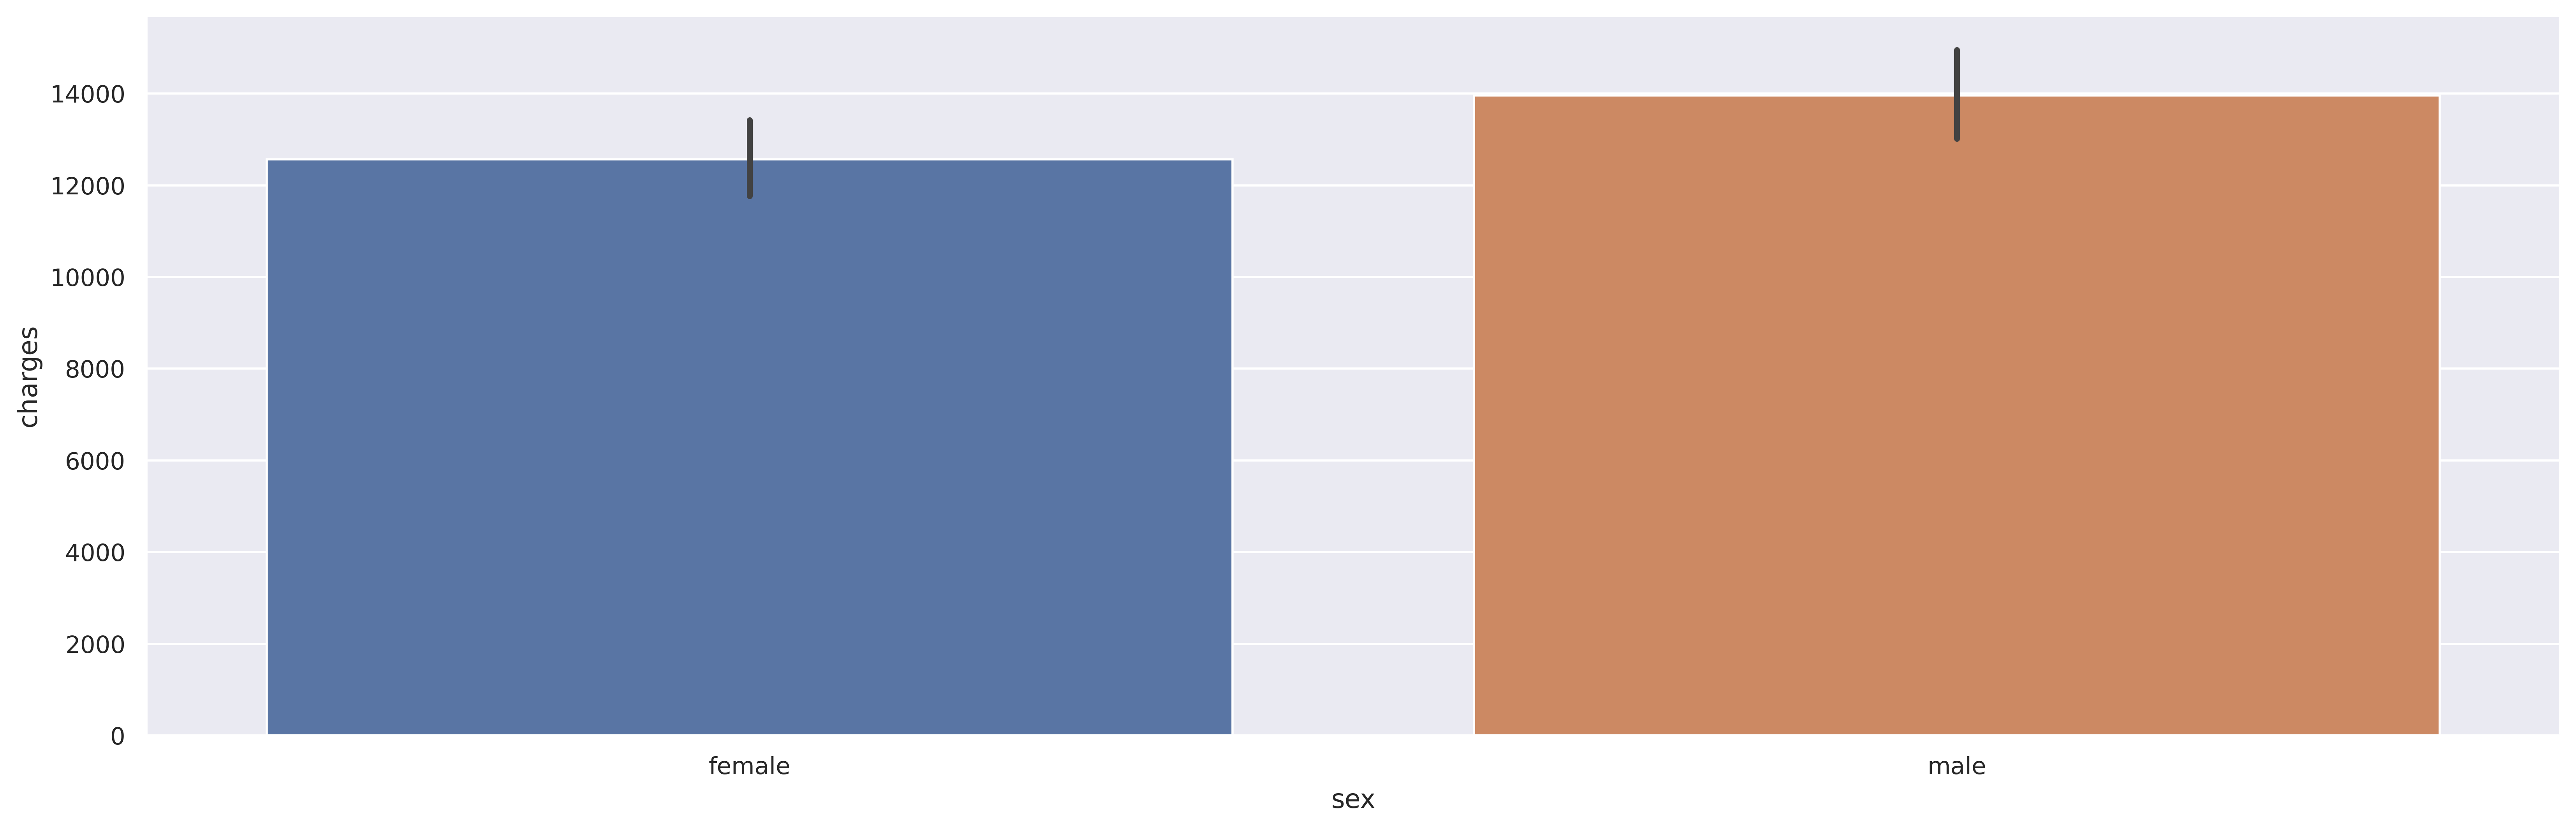

In [27]:
sns.set()
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot( x = 'sex',  y = 'charges', data = health_df)

<Axes: xlabel='age', ylabel='children'>

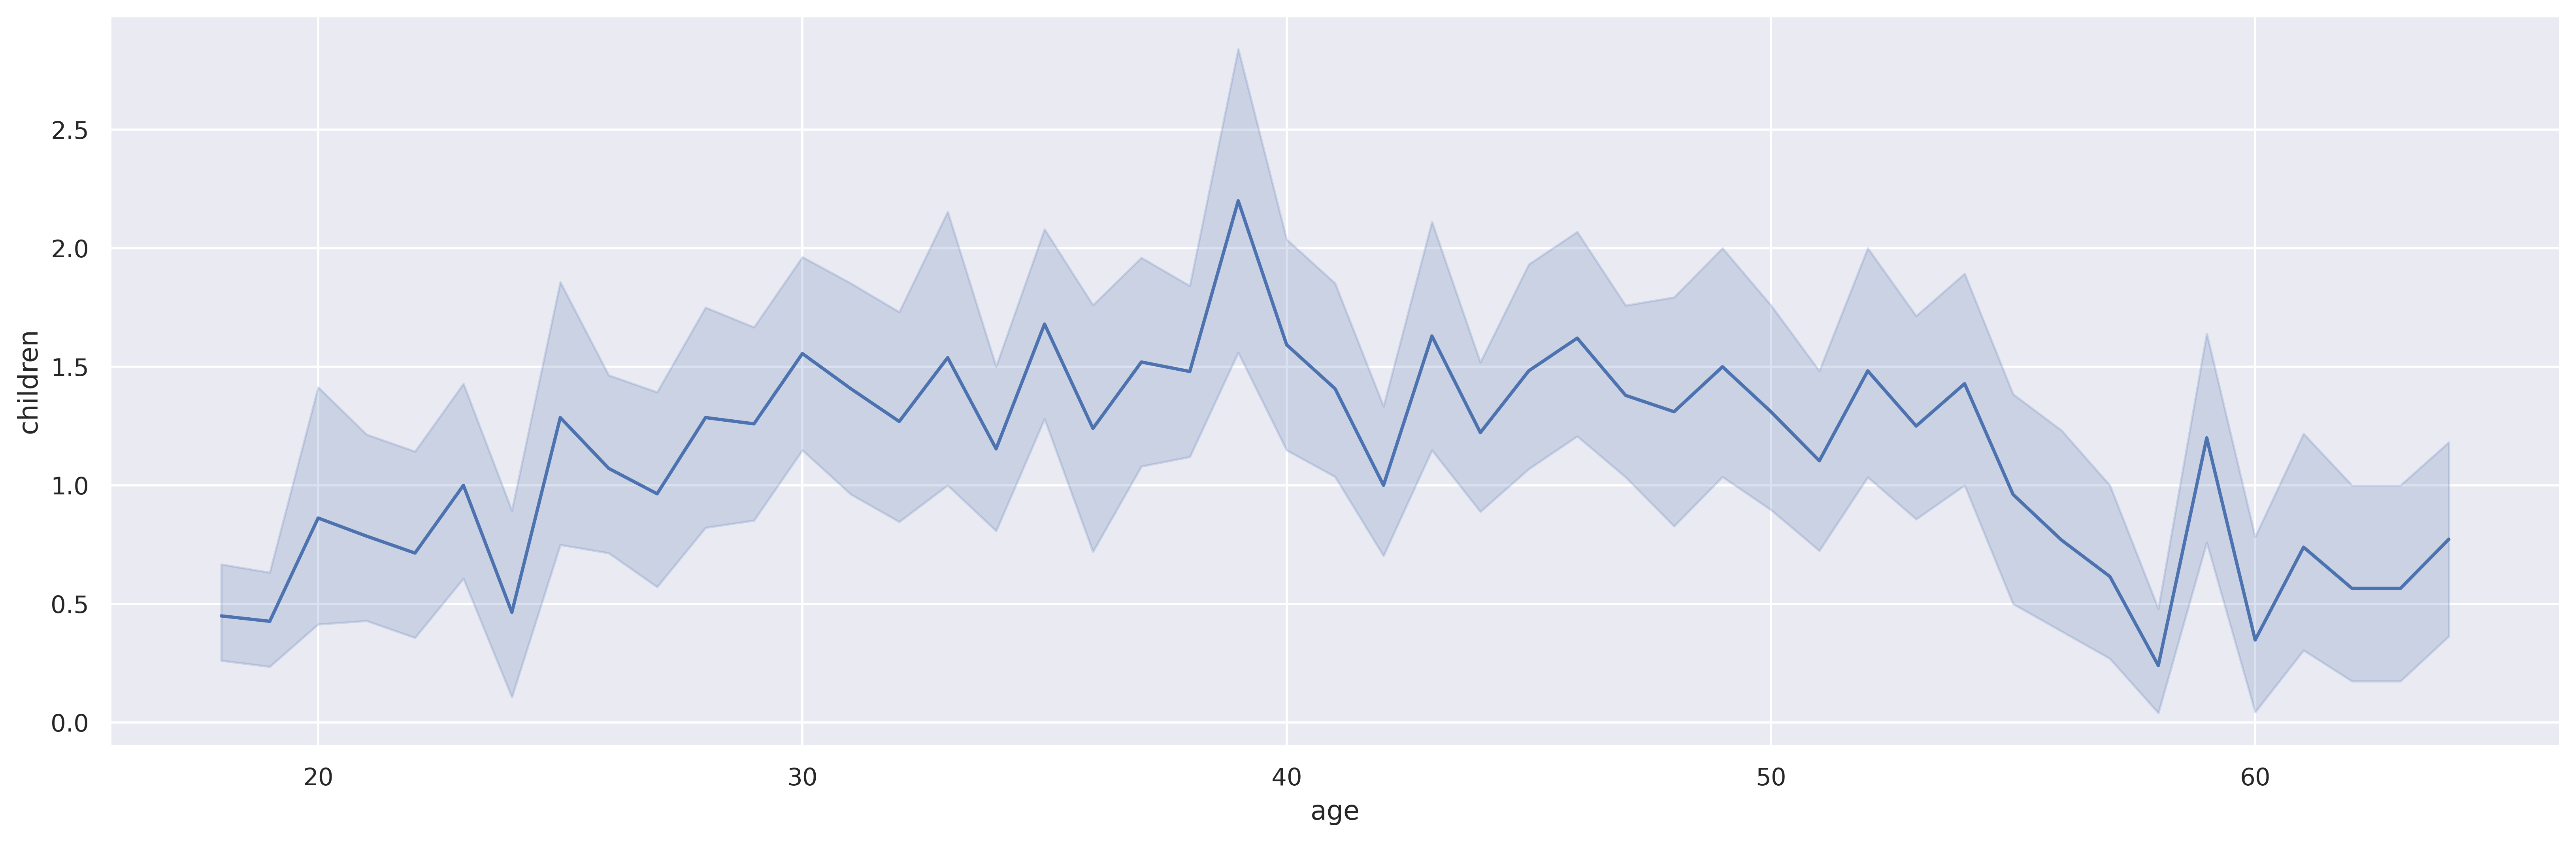

In [28]:
sns.set()
plt.figure(figsize = (20,6), dpi = 400)
sns.lineplot(x='age',y='children',data=health_df)

<ipython-input-29-b2016f19da44>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=health_df, x='age', hue='children', shade=True)


Text(0.5, 1.0, 'Distribution of AGE by No. of Children')

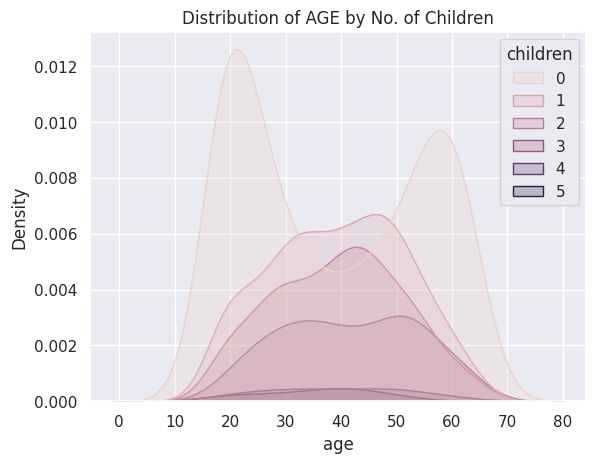

In [29]:
sns.kdeplot(data=health_df, x='age', hue='children', shade=True)

plt.title("Distribution of AGE by No. of Children")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


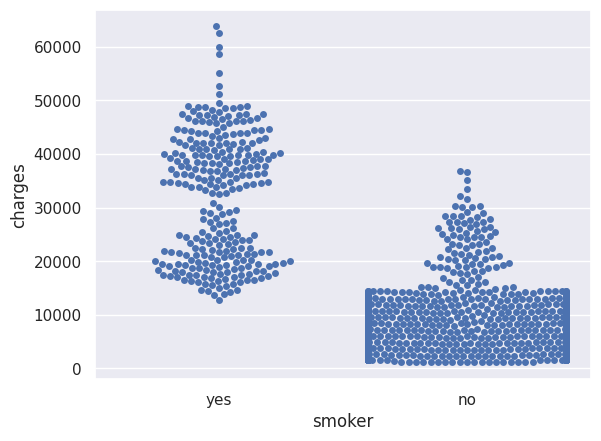

In [30]:
sns.swarmplot(x=health_df['smoker'],y=health_df['charges'])

In [31]:
Age=pd.read_csv('/content/drive/MyDrive/Health care/Age.csv')
Children=pd.read_csv('/content/drive/MyDrive/Health care/Children.csv')
charges=pd.read_csv('/content/drive/MyDrive/Health care/charges.csv')

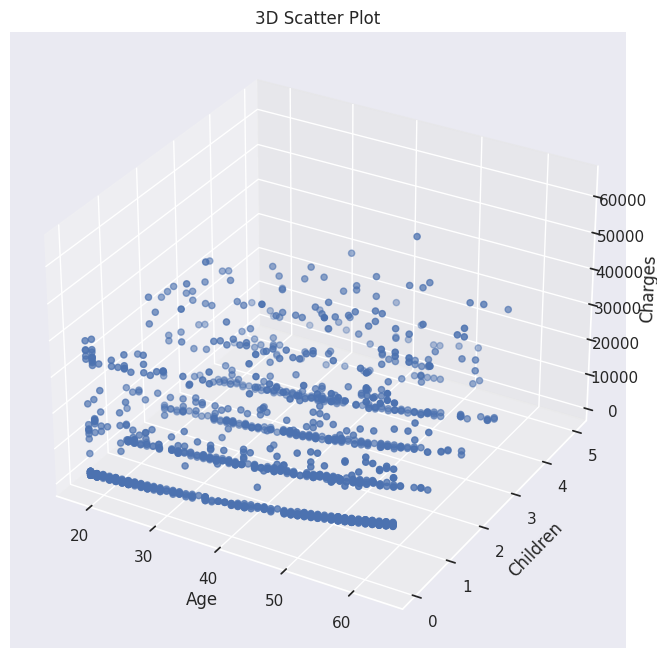

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Age, Children, charges, c='b', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Children')
ax.set_zlabel('Charges')

plt.title('3D Scatter Plot')
plt.show()